In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

In [6]:
data_frame = pd.read_csv('train-perceptron.txt', sep=" " , header = None,names = ['x1','x2','label'])
data_frame

,x1,x2,label
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


<Axes: xlabel='x1', ylabel='x2'>

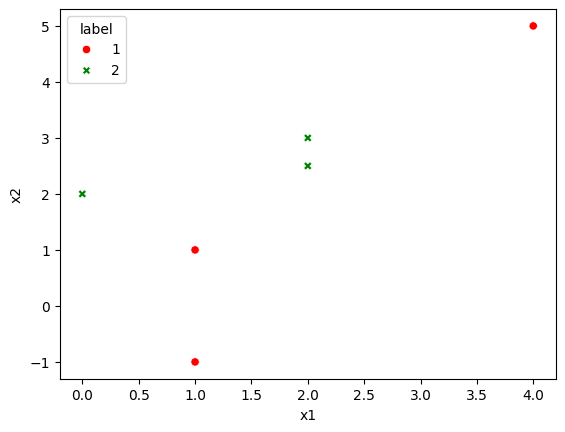

In [7]:
sns.scatterplot(data=data_frame, x='x1', y='x2', hue='label', palette=['red', 'green'], style='label')

In [38]:
data_frame['x1^2'] = data_frame['x1']**2
data_frame['x2^2'] = data_frame['x2']**2
data_frame['x1*x2'] = data_frame['x1'] * data_frame['x2']
data_frame['1'] = 1
data_frame = data_frame[['x1^2', 'x2^2', 'x1*x2', 'x1', 'x2', '1', 'label']]
data_frame

,x1^2,x2^2,x1*x2,x1,x2,1,label
0,1,1.00,1.0,1,1.0,1,1
1,1,1.00,-1.0,1,-1.0,1,1
2,4,6.25,5.0,2,2.5,1,2
3,0,4.00,0.0,0,2.0,1,2
4,4,9.00,6.0,2,3.0,1,2
5,16,25.00,20.0,4,5.0,1,1


In [11]:
data_frame2 = data_frame.copy()
data_frame2.drop(['label'], axis=1, inplace=True)
data_frame2[data_frame['label'] == 1] *= -1

data_frame2

,x1^2,x2^2,x1*x2,x1,x2,1
0,-1,-1.00,-1.0,-1,-1.0,-1
1,-1,-1.00,1.0,-1,1.0,-1
2,4,6.25,5.0,2,2.5,1
3,0,4.00,0.0,0,2.0,1
4,4,9.00,6.0,2,3.0,1
5,-16,-25.00,-20.0,-4,-5.0,-1


In [39]:
inputs = np.array(data_frame2)

class Perceptron:
    def __init__(self, inputs, weights, learning_rate):
        self.inputs = inputs
        self.weights = weights
        self.learning_rate = learning_rate

    def train_one_at_a_time(self):
        iteration = 0
        while True:
            update_flag = 0
            for i in range(self.inputs.shape[0]):
                dot_product = np.dot(self.weights, self.inputs[i])
                if dot_product <= 0:
                    update_flag = 1
                    self.weights = self.weights + self.learning_rate * self.inputs[i]
            if not update_flag:
                break
            iteration += 1
        return self.weights, iteration

    def train_many_at_a_time(self):
        iteration = 0
        while True:
            temp = np.zeros((6))
            update_flag = 0
            for i in range(self.inputs.shape[0]):
                dot_product = np.dot(self.weights, self.inputs[i])
                if dot_product <= 0:
                    update_flag = 1
                    temp += self.inputs[i]
            if update_flag == 0:
                break
            iteration += 1
            self.weights = self.weights + self.learning_rate * temp
        return self.weights, iteration

In [19]:
zeros = np.zeros(6)
ones = np.ones(6)
randoms = np.random.rand(6)

learning_rate = Decimal('0.1')
results = []
while learning_rate <= 1:
  perceptron = Perceptron(inputs, zeros, float(learning_rate))
  _, iterations_one_at_a_time = perceptron.train_one_at_a_time()

  perceptron = Perceptron(inputs, zeros, float(learning_rate))
  _, iterations_many_at_a_time = perceptron.train_many_at_a_time()

  results.append([float(learning_rate), iterations_one_at_a_time, iterations_many_at_a_time])

  learning_rate += Decimal('0.1')

numpy_results = np.array(results)
zero_results = numpy_results

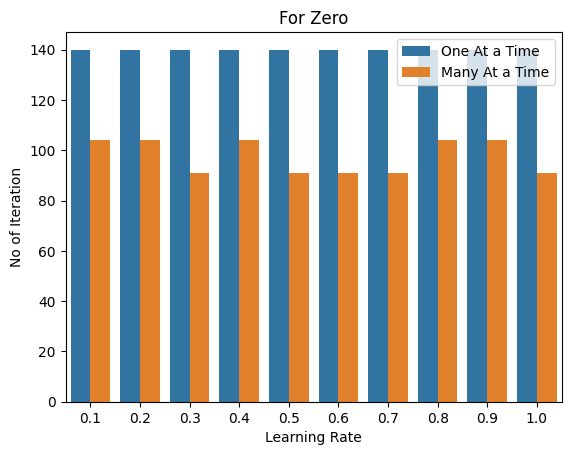

In [24]:
df = pd.DataFrame(numpy_results, columns=['Learning Rate', 'One At a Time', 'Many At a Time'])

df_melted = df.melt(id_vars='Learning Rate', var_name='Method', value_name='No of Iteration')

sns.barplot(x='Learning Rate', y='No of Iteration', hue='Method', data=df_melted)

plt.title('For Zero')
plt.legend()
plt.show()

In [25]:
learning_rate = Decimal('0.1')
results = []
while learning_rate <= 1:
  perceptron = Perceptron(inputs, ones, float(learning_rate))
  _, iterations_one_at_a_time = perceptron.train_one_at_a_time()

  perceptron = Perceptron(inputs, ones, float(learning_rate))
  _, iterations_many_at_a_time = perceptron.train_many_at_a_time()

  results.append([float(learning_rate), iterations_one_at_a_time, iterations_many_at_a_time])

  learning_rate += Decimal('0.1')

numpy_results = np.array(results)
one_results = numpy_results

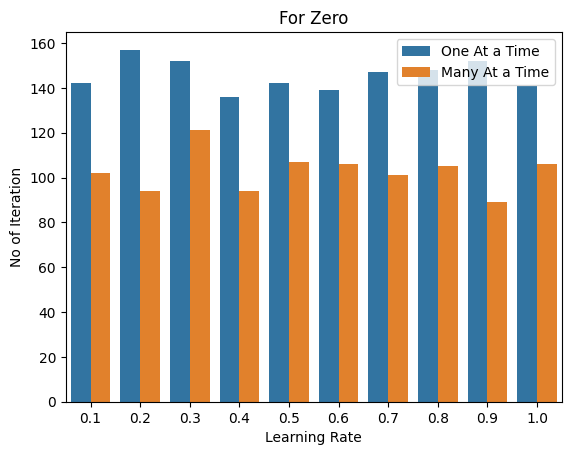

In [26]:
df = pd.DataFrame(numpy_results, columns=['Learning Rate', 'One At a Time', 'Many At a Time'])

df_melted = df.melt(id_vars='Learning Rate', var_name='Method', value_name='No of Iteration')

sns.barplot(x='Learning Rate', y='No of Iteration', hue='Method', data=df_melted)

plt.title('For One')
plt.legend()
plt.show()

In [32]:
learning_rate = Decimal('0.1')
results = []
while learning_rate <= 1:
  perceptron = Perceptron(inputs, randoms, float(learning_rate))
  _, iterations_one_at_a_time = perceptron.train_one_at_a_time()

  perceptron = Perceptron(inputs, randoms, float(learning_rate))
  _, iterations_many_at_a_time = perceptron.train_many_at_a_time()

  results.append([float(learning_rate), iterations_one_at_a_time, iterations_many_at_a_time])

  learning_rate += Decimal('0.1')

numpy_results = np.array(results)
random_results = numpy_results

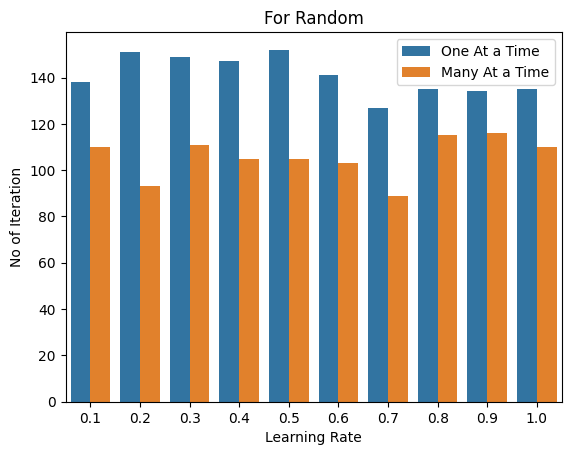

In [33]:
df = pd.DataFrame(numpy_results, columns=['Learning Rate', 'One At a Time', 'Many At a Time'])

df_melted = df.melt(id_vars='Learning Rate', var_name='Method', value_name='No of Iteration')

sns.barplot(x='Learning Rate', y='No of Iteration', hue='Method', data=df_melted)

plt.title('For Random')
plt.legend()
plt.show()

In [34]:
def display_table(results):

    _, ax = plt.subplots()
    ax.axis('off')

    table = ax.table(
        cellText=results,
        colLabels=['Alpha (Learning Rate)', 'One at a Time', 'Many at a Time'],
        cellLoc='center',
        loc='center'
    )

    table.set_fontsize(30)
    table.scale(2, 2)

    plt.show()

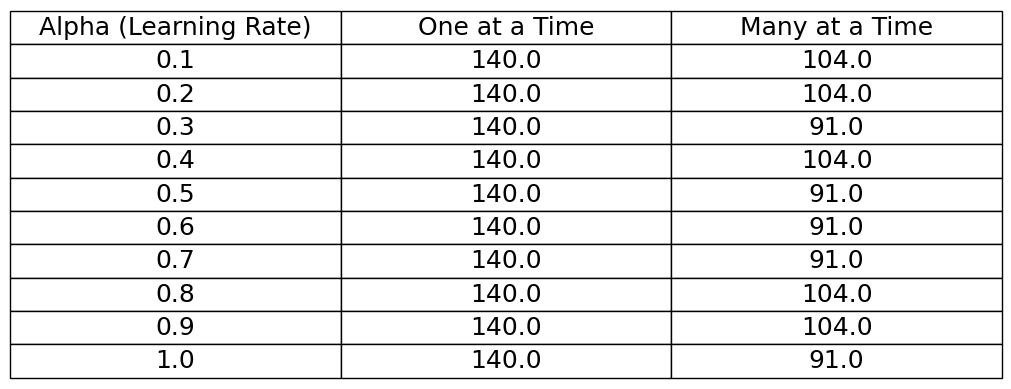

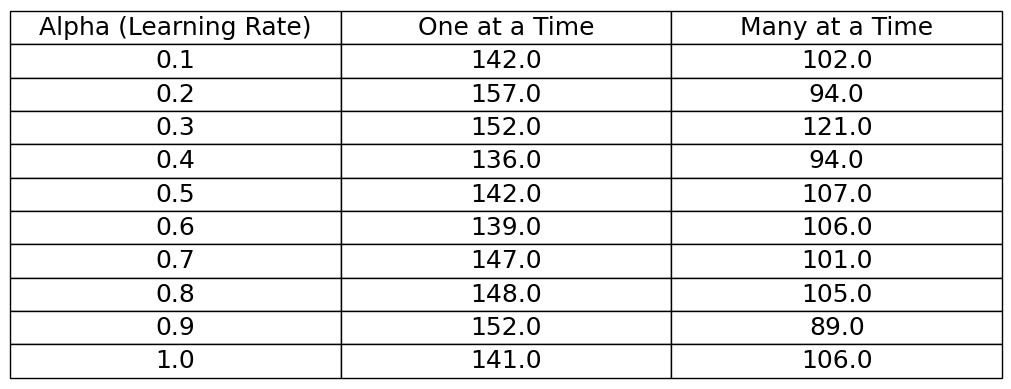

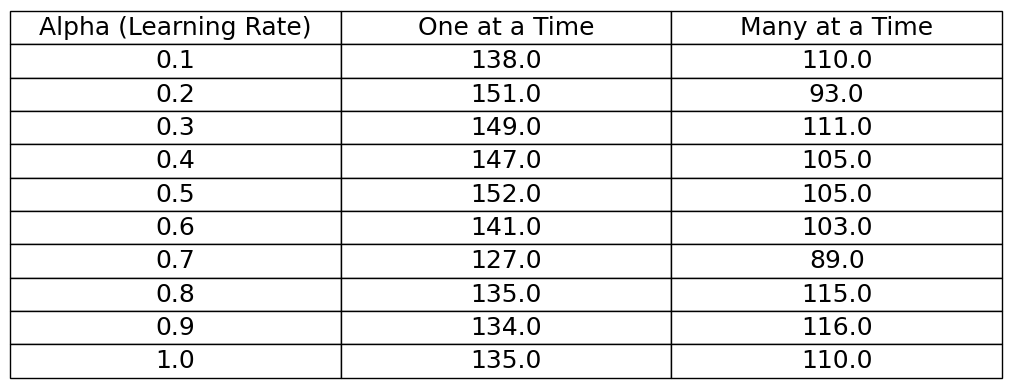

In [36]:
display_table(zero_results)
display_table(one_results)
display_table(random_results)